# Day-12

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv("general_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


# Data cleaning:

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [65]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [10]:
df = df.drop_duplicates()

In [11]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [12]:
df.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
EmployeeCount                  1.0
EmployeeID                  2205.5
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [14]:
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [15]:
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [16]:
df[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

Inference from the analysis:
- All the above variables show positive skewness; while Age & Mean_distance_from_home
are leptokurtic and all other variables are platykurtic.
- The Mean_Monthly_Income’s IQR is at 54K suggesting company wide attrition across all
income bands
- Mean age forms a near normal distribution with 13 years of IQR
Outliers:
There’s no regression found while plotting Age, MonthlyIncome, TotalWorkingYears,
YearsAtCompany, etc., on a scatter plot

# Visualisation:

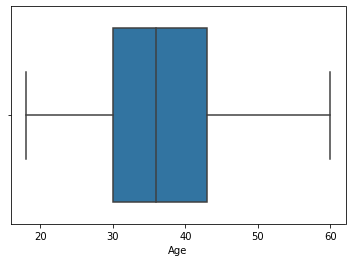

In [24]:
sns.boxplot(df["Age"])

Age is normally distributed without any outliers

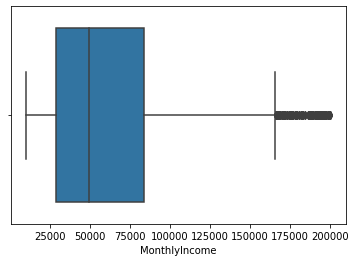

In [23]:
sns.boxplot(df["MonthlyIncome"])

Monthly Income is Right skewed with several outliers

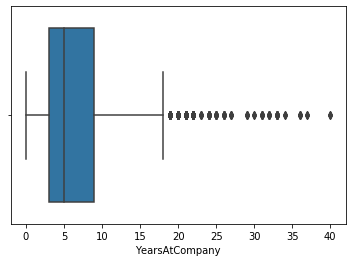

In [25]:
sns.boxplot(df["YearsAtCompany"])

Years at company is also Right Skewed with several outliers observed.

In [39]:
atr = df[df["Attrition"]=="Yes"]
atr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2


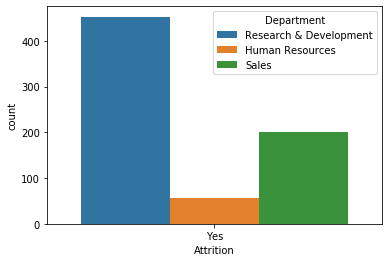

In [44]:
sns.countplot("Attrition",hue="Department",data=atr)

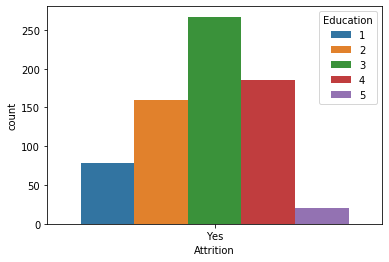

In [41]:
sns.countplot("Attrition",hue="Education",data=atr)

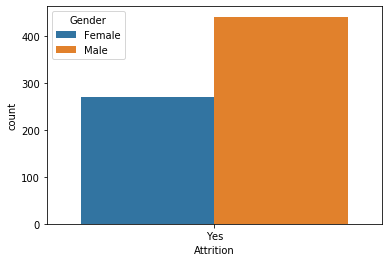

In [42]:
sns.countplot("Attrition",hue="Gender",data=atr)

In [50]:
df["Attrition"] = df["Attrition"].astype("category")
df["Attrition"] = df["Attrition"].cat.codes

# Finding pearson's correlation coefficient and inference:

In [46]:
from scipy.stats import pearsonr
df['TotalWorkingYears']=df['TotalWorkingYears'].fillna(11.28)

In [51]:
r,p = pearsonr(df["Attrition"], df["DistanceFromHome"])
print(r, p)

-0.009730141010179666 0.5182860428050771


- As r = -0.009, there’s low negative correlation between Attrition and DistanceFromHome
- As the P value of 0.518 is > 0.05, we are accepting H0 and hence there’s no significant correlation
between Attrition & DistanceFromHome

In [57]:
r,p = pearsonr(df["Attrition"], df["MonthlyIncome"])
print(r, p)

-0.03117628169811501 0.03842748490600132


- As r = -0.031, there’s low negative correlation between Attrition and MonthlyIncome
- As the P value of 0.038 is < 0.05, we are accepting H1 and hence there’s significant correlation
between Attrition & MonthlyIncome

In [62]:
r,p = pearsonr(df["Attrition"], df["TotalWorkingYears"])
print(r,p)

-0.17011136355965178 5.4731597517922494e-30


- As r = -0.17, there’s low negative correlation between Attrition and TotalWorkingYears
- As the P value is < 0.05, we are accepting H1 and hence there’s significant correlation between
Attrition & TotalWorkingYears

In [61]:
r,p=pearsonr(df["Attrition"], df["YearsWithCurrManager"])
print(r,p)

-0.15619931590162842 1.7339322652900218e-25


- As r = -0.1561, there’s low negative correlation between Attrition and YearsWithCurrManager
- As the P value is < 0.05, we are accepting Ha and hence there’s significant correlation between
Attrition & YearsWithCurrManager